## 3. Supervised machine learning: classification
- Train, test, and validate a machine learning model for classification and prediction of
employees’ attrition 
- Apply appropriate measures for measuring of the accuracy of the model

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt


In [93]:
dataset = '../data/cleaned_HR-Employee-Attrition.csv'
df = pd.read_csv(dataset, header=0)

Check the cleaning: Have irrelevant columns been dropped and are the values numerical?

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   OverTime                 779 non-null    int64
 1   StockOptionLevel         779 non-null    int64
 2   TotalWorkingYears        779 non-null    int64
 3   YearsAtCompany           779 non-null    int64
 4   YearsInCurrentRole       779 non-null    int64
 5   Age                      779 non-null    int64
 6   JobLevel                 779 non-null    int64
 7   YearsWithCurrManager     779 non-null    int64
 8   MonthlyIncome            779 non-null    int64
 9   MaritalStatus            779 non-null    int64
 10  JobInvolvement           779 non-null    int64
 11  EnvironmentSatisfaction  779 non-null    int64
 12  DistanceFromHome         779 non-null    int64
 13  JobSatisfaction          779 non-null    int64
 14  JobRole                  779 non-null    int64
 15  Depart

### Define Features (X) and Target (y)
'Attrition' will be our target, since we are building a model to predict that. All other columns are features.

In [95]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

###  Train-Test Split
We split the dataset into training and testing subsets to evaluate machine learning models properly.

In [96]:
# test size is set to 20%, so 80% goes to training
# set the random seed to fixed value for reproducibility
# make sure the Attrition is preserved in both train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

###  Train a Random Forest Classifier
Based on the fact that we are trying to predict 'Attrition' and the classifiers we have learned, we've decided to use Random Forest. 
* It handles non-linear relationships and interactions (fx how 'YearsAtCompany ' and 'JobSatisfaction' could affect attrition together)
* It is robust and there's less overfitting

In [97]:
clf = RandomForestClassifier(random_state=42) # fixed seed for reproducibility
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict and Evaluate

* From our trained Random Forest Classifier above we make predictions on unseen test data.
* We will compare the true values with predicted values and build a Confusion matrix. The matrix helps us understand how well the classifier did based on number of cases of correct or wrong prediction

In [98]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[125   3]
 [ 19   9]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       128
           1       0.75      0.32      0.45        28

    accuracy                           0.86       156
   macro avg       0.81      0.65      0.68       156
weighted avg       0.85      0.86      0.83       156

Accuracy: 0.8589743589743589


Gicen the above result for the Confusion matrix we can conclude:
* 125 people where true negatives, so they have been correctly predicted to stay
* 3 people were false positives, so they were predicted to leave but they ended up staying
* 19 people were false negatives, so they were predicted to stay but they ended up leaving
* 9 people where true positives, so they have been correctly predicted to leave

Looking at the result of the classification report we can deduce:
- For the employees who stayed (Class 0):
    - 87% actually stayed
    - 98% of those who stayed where correctly identified
    - The F1-score of 0.92 shows that there's a good balance between precision and recall and a good prediction of the employees that stays
- For the employees that left (Class 1):
    - It seems that only 75% of those predicted to leave actually left
    - But only 32% was found of those that actually left, which is a bad sign
    - The F1-score of 0.45 shows that there's a bad balance between precision and recall, which means that the model have a low overall effectiveness at predicting the employees that leaves.


The accuracy being almost 86% for the prediction is a decent result, but seems imbalanced since there were actually more leavers than predicted. The amount of leavers, which in total is 28, compared to the predicted only 9 people, is too high. Therefore the accuracy is a bit misleading.

### Feauture importance
We can now visualize feature importances to understand what the Random Forest model thinks matters most when predicting employee attrition.

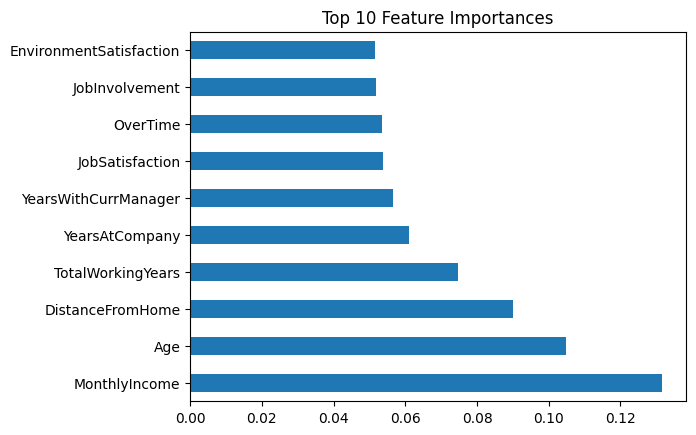

In [102]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

Looking at the above plot based on the top 10 features, we can derive several important insights:
1. 'MonthlyIncome' is the top predictor/most important factor
    -  Employees with lower salaries might be more inclined to leave for better opportunities. High compensation can be a strong retention factor.
2. 'Age' and 'TotalWorkingYears' plays a significant role
    -  Younger employees or those with less experience might be more likely to leave in search of better growth opportunities. On the other hand, older or more experienced employees might expect career stability.
3. 'DistanceFromHome' is a relatively important feature
    -  Employees who live farther away from the office may be more prone to attrition due to long commutes. This can lead to higher burnout or dissatisfaction, especially in jobs that are physically demanding.
4. 'YearsAtCompany' and 'YearsWithCurrManager' are also important factors
    -  Employees who have worked at the company for a longer time or who have been with the same manager for several years may experience stagnation or a lack of new challenges, which could influence their decision to leave.
5. 'JobSatisfaction' and 'JobInvolvement' are also significant but less so than the factors above
    -  Employees who feel dissatisfied or disengaged with their job may be more likely to leave. This suggests that improving employee engagement and satisfaction could reduce attrition.
6. 'OverTime' has notable importance as well
    - Employees who work overtime frequently may experience burnout or work-life imbalance, leading them to seek employment elsewhere.
7. 'EnvironmentSatisfaction' reflects the importance of the work environment
    -  A negative work environment can influence an employee's decision to leave, especially if they feel their workplace is toxic or lacks the necessary support.

The Random Forest model suggests that employees' income, age, commute distance, and tenure are the primary factors influencing attrition. Job satisfaction, overtime, and the work environment also play key roles, but not as much as the other features.
